# Kickstarter - Meme Master Memory

by Martina Gottschalk, Petra Pinger and Ole Hansen 

## Business case: 
Mr. Brain invented a Meme Master Memory (a memory game with videos/gifs) and needs money for the implementation. He wants to do the project in 4 weeks, wants to get 100,000USD and wants to launch the campaign in summertime in the category photography.
Under these circumstances, will the project be successful? Furthermore we want to recommend Mr. Brain different improvements to increase his chance for success. In addition we also want to predict his potential pledged amount.

## Approach:

* Business Understanding:
    * Kickstarter is a Crowdfunding website that enables entrepreneurs to fund money for their business ideas.
    * With regard to our business case we are looking for the features that might be relavant for the success of the project, especially with regard to the characteristics of our stakeholders project (e.g., product category, season) 
    * Evaluation metrics: It is in our stakeholders interest that we are confident in our prediction of success and that we avoid the case that our stakeholder puts a lot of effort in a project that is likely to fail. In other words we want to avoid a false positive prediction and that is why we choose precision as our main evlaution metric.
<br/>
<br/>
* Data Collection 
    * For our data analysis and modeling we use a well known kaggle dataset. Our data science bootcamp teachers gave us the dataset but similar datasets can be found online.
    * An overview of all the columns in the dataset can be found below.
<br/>
<br/>
* EDA:
    * see Jupyter Notebook "Kickstarter_EDA" for an EDA 
<br/>
<br/>
* Feature Engineering / Data Cleaning:
    * see Jupyter Notebook "Kickstarter" for data preparation, cleaning and feature engineering
<br/> 
<br/>
* Predictive Modeling
    * We will use a simple logistic regression, SVM and random forest to predict the success of the project. The classification models can be found in the Jupyter Notebook "Kickstarter"
    * For the prediciton of the total amount that the stakeholder could pledge we use a polynomial regression, random forest and Adaboost. This is still work in progess. First models do not show a reasonable fit and further analyses might be needed.
<br/>
<br/>
* Stakeholder Presentation  

## EDA
Goal of the EDA is to get an overview of relevant features for the business case. In the EDA we check the distributions of different features and our target. This final notebook contains a summary of all relevant plots and charts. Our analysis was guided by the following assumptions.

### Assumptions
* The category in which the project is published has an impact on the success. For example projects published in the game category are more successful.
* The season in which the project is launched is important.
* Longer preparation and duration time influences the chance of success.
* The goal shouldn´t be set too high.

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import time
import datetime as dt
import json
import matplotlib.pyplot as plt

In [2]:
# read in data
df = pd.read_csv('data/Kickstarter_merged.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

In [4]:
df.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05
mean,145.419057,1.289290e+04,1.456089e+09,1.463033e+09,0.994857,4.917604e+04,1.073222e+09,1.460206e+09,1.881403e+04,1.462838e+09,1.010757,1.289213e+04
std,885.967976,8.889414e+04,6.339711e+07,6.305618e+07,0.211654,1.179427e+06,6.198051e+08,6.309029e+07,3.229596e+05,6.290421e+07,0.231893,8.890124e+04
min,0.000000,0.000000e+00,1.240366e+09,1.241334e+09,0.008966,1.000000e-02,8.624000e+03,1.240603e+09,0.000000e+00,1.241334e+09,0.008771,0.000000e+00
25%,4.000000,1.060000e+02,1.413317e+09,1.420607e+09,1.000000,1.500000e+03,5.351054e+08,1.417639e+09,1.100000e+02,1.420485e+09,1.000000,1.060014e+02
50%,27.000000,1.537000e+03,1.457895e+09,1.464754e+09,1.000000,5.000000e+03,1.074579e+09,1.461924e+09,1.556000e+03,1.464709e+09,1.000000,1.537358e+03
75%,89.000000,6.548000e+03,1.511595e+09,1.519437e+09,1.000000,1.500000e+04,1.609369e+09,1.516694e+09,6.887200e+03,1.519366e+09,1.000000,6.550000e+03
max,105857.000000,8.596474e+06,1.552527e+09,1.557721e+09,1.876033,1.000000e+08,2.147476e+09,1.552537e+09,8.103074e+07,1.552537e+09,1.716408,8.596475e+06


First we define our target. We are interested in the state of success. So "state" is our target value for the classification. We are also interested in how much money is pledged for projects.

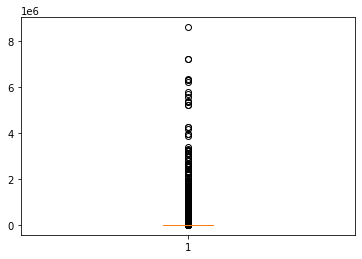

In [5]:
plt.boxplot(x=df['usd_pledged']);

usd_pledged is very skewed. Therefore we will log transform the values for better visualizations. To avoid columns with value zero we add a small constant.

In [6]:
# log transformation
df['usd_pledged'] = df['usd_pledged'] + 0.00001
df['usd_pledged_log'] = np.log(df['usd_pledged'])

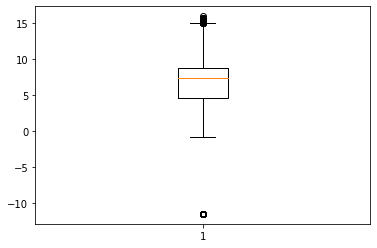

In [7]:
# plot usd_pledged
plt.boxplot(x=df['usd_pledged_log']);

Let´s also get an overview of the other target "state". 

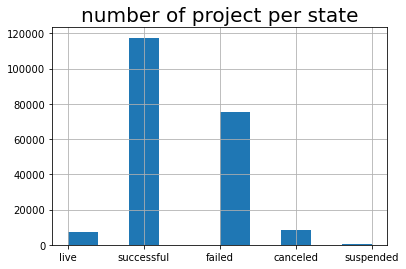

In [8]:
# overview how many projects were successful, failed, canceled
df['state'].hist()
plt.title('number of project per state', fontsize=20);

We think that category could be an important feature. In the dataset the column is a json file. Therefore we have to read the categoryname out of the json file.

In [9]:
# new columns with information from 'category'
df['category_parent_id'] = pd.DataFrame([json.loads(df["category"][i]).get("parent_id") for i in range(df.shape[0])])
df['category_id'] = pd.DataFrame([json.loads(df["category"][i]).get("id") for i in range(df.shape[0])])
df['category_name'] = pd.DataFrame([json.loads(df["category"][i]).get("name") for i in range(df.shape[0])])
df['category_parent_id'] = df['category_parent_id'].fillna(0).astype("int")

In [10]:
# adds helper list as column to dataframe 
def add_list_as_column(df, column_name, list_name):
    '''Adds helper list as column to dataframe and retruns updated dataframe'''
    df[column_name] = pd.DataFrame(list_name)
    return df

In [11]:
def add_parent_id(df):
    '''Extracts Parent ID out of the Category json and adds the Column to Dataframe. Returns updated Dataframe'''
    df['category_parent_id'] = pd.DataFrame([json.loads(df["category"][i]).get("parent_id") for i in range(df.shape[0])])
    return df

In [12]:
def add_category_id(df):
    '''Extracts category ID out of the Category json and adds the Column to Dataframe. Returns updated Dataframe'''
    df['category_id'] = pd.DataFrame([json.loads(df["category"][i]).get("id") for i in range(df.shape[0])])
    return df

In [13]:
def add_category_name(df):
    '''Extracts category name out of the Category json and adds the Column to Dataframe. Returns updated Dataframe'''
    df['category_name'] = pd.DataFrame([json.loads(df["category"][i]).get("name") for i in range(df.shape[0])])
    return df

In [14]:
def fill_na(df, column_name):
    '''Fill Missings with 0 as type integer. Returns updated dataframe. eg, for parent ID and pledged per backer'''
    df[column_name] = df[column_name].fillna(0).astype("int")
    return df

In [15]:
def add_parent_name(df, column_name1, column_name2, dictionary):
    '''based on key value in a column, column with value is added as a column and updated dataframe is returned. 
    Example:
        parents_dict = {1: "Art", 3: "Comics", 6: "Dance", 7: "Design", 9: "Fashion", 10: "Food",
                11: "Film & Video", 12: "Games", 13: "Journalism", 14: "Music", 15: "Photography", 16: "Technology",
               17: "Theater", 18: "Publishing", 26: "Crafts"}
            df["parent_name"] = df["filled_parent"].apply(lambda x: parents_dict.get(x))'''
    df[column_name1] = df[column_name2].apply(lambda x: dictionary.get(x))
    return df

In [16]:
df = add_parent_id(df)
df = add_category_id(df)
df = add_category_name(df)
df = fill_na(df, 'category_parent_id')

In [17]:
empty = []
for i in range(df.shape[0]):
    if df["category_parent_id"][i] != 0:
        empty.append(df["category_parent_id"][i])
    else:
        empty.append(df["category_id"][i])

In [18]:
df = add_list_as_column(df, "filled_parent", empty)

In [19]:
df = add_parent_name(df, "parent_name", "filled_parent", {1: "Art", 3: "Comics", 6: "Dance", 7: "Design", 9: "Fashion", 10: "Food",
                11: "Film & Video", 12: "Games", 13: "Journalism", 14: "Music", 15: "Photography", 16: "Technology",
               17: "Theater", 18: "Publishing", 26: "Crafts"})

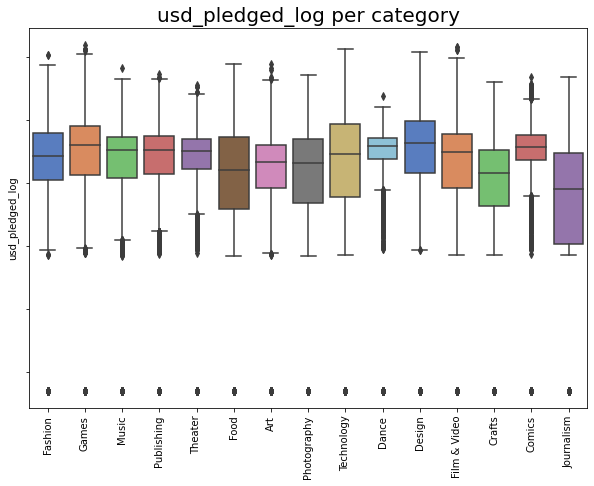

In [20]:
all_cats = df.parent_name.unique()

# plot categories in relation to usd_pledged
plt.figure(figsize=(10,7))

fig2 = sns.boxplot(y="usd_pledged_log", x="parent_name", data=df, palette = 'muted')
fig2.set_xticks(range(15))
fig2.set_xticklabels(all_cats, rotation=90)
fig2.set_yticklabels([])
fig2.set_xlabel(None)
fig2.set_ylabel('usd_pledged_log')
plt.title('usd_pledged_log per category', fontsize=20);

From the boxplots above we can see that some categories pledge higher amounts than others. Our stakeholders project will fall into more successfull categories like Design, Games, Technology, Film&Video and Art.

Because we think preparation and duration time and also the season are important we will create new columns.

In [21]:
#funtion to extract the month out of the number
def extract_month(number):
    '''Extracts the month out of the number and returns the month'''
    gmtime = time.gmtime(number)
    return gmtime[1]

In [22]:
# Adding column with month the project was launched
def adding_month_launched(df):  
    '''Adding column with month the project was launched and returns the updated dataframe'''
    df["launched_month"] = df.apply(lambda x: extract_month(x["launched_at"]), axis=1)
    return df

In [23]:
df = adding_month_launched(df)

In [24]:
def duration(deadline, launched_at):
    '''Calculating difference between two timepoints and returns it in days'''
    duration = deadline - launched_at
    duration_complete = dt.timedelta(seconds=duration)
    return duration_complete.days

In [25]:
# Adding column with duration in days
def adding_duration(df):
    '''Adding column with duration in days and returns updated dataframe'''
    df["duration_days"] = df.apply(lambda x: duration(x["deadline"], x["launched_at"]), axis=1)
    return df

In [ ]:
df = adding_duration(df)

In [ ]:
def adding_preparation(df):
    '''Adding column with preparation in days and returns updated dataframe'''
    df["preparation"] = df.apply(lambda x: duration(x["launched_at"], x["created_at"]), axis=1)
    return df

In [ ]:
df = adding_preparation(df)

In [ ]:
# plot relation between month launched and state
sns.catplot(x = "launched_month", kind = 'count', hue = 'state', data=df, aspect=2, palette = 'muted')
plt.title('project state per month', fontsize=20);

In December fewer projects are launched. The proportion of successful prjects seems to be likely higher in September to November.

In [ ]:
# plot relation usd_pledged and launched_month
var = 'launched_month'
data = pd.concat([df['usd_pledged_log'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.violinplot(x=var, y='usd_pledged_log', data=data, palette = 'muted')
fig.axis(ymin=0, ymax=17)
plt.title('usd_pledged_log', fontsize=20);

There are only small differences between each month. But again September until November the amount of pledged money is slightly higher. 

In [ ]:
df = df.query('state == "successful" or state == "failed"')

In [ ]:
df_mean_duration = df.groupby(['state'])['duration_days'].mean().round(2).reset_index()
df_median_duration = df.groupby(['state'])['duration_days'].median().reset_index()
d = pd.merge(df_mean_duration, df_median_duration, on=['state'], suffixes=[' mean', ' median']).plot(kind='bar')
legend = ['duration mean', 'duration median']
d.legend(legend,loc=4)
d.set_xticklabels(['failed', 'successful'], rotation=0);

In [ ]:
df_mean_preparation = df.groupby(['state'])['preparation'].mean().round(2).reset_index()
df_median_preparation = df.groupby(['state'])['preparation'].median().reset_index()
a = pd.merge(df_mean_preparation, df_median_preparation, on=['state'], suffixes=[' mean', ' median']).plot(kind='bar')
legend = ['preparation mean', 'preparation median']
a.legend(legend,loc=4)
a.set_xticklabels(['failed', 'successful'], rotation=0);

A good length for duration time are 30 days and in general successful projects take longer time for preparation.
Now let´s have a look on the relation between goal and the state.

In [ ]:
df_mean_goal = df.groupby(['state'])['goal'].mean().round(2).reset_index()
df_median_goal = df.groupby(['state'])['goal'].median().reset_index()
c = pd.merge(df_mean_goal, df_median_goal, on=['state'], suffixes=[' mean', ' median']).plot(kind='bar')
c.set_xticklabels(['failed', 'successful'], rotation=0);

As expected we see in the plot that successful projects set lower goals which are easier to achieve.

## Future work
* Check the relation between the project descriptions and the state
* Outlier detection
* Correlations between all features